In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 파일 경로
file_path = r"D:\바탕화면\지후의 생각\9-12공부\가온\Test\수차_all"
file_names = [f for f in os.listdir(file_path) if f.endswith('.pkl')]
variable_path = r"D:\바탕화면\지후의 생각\9-12공부\가온\Model"
variable_names = [f for f in os.listdir(variable_path) if f.startswith('수차')]

# 각 파일을 반복문으로 처리하고 데이터 불러오기 및 변수 설정
for file_name in file_names:
    use_path = os.path.join(file_path, file_name)
    data = pd.read_pickle(use_path).fillna(method='bfill').fillna(method='ffill')
    data_name = file_name[:-4]  # 변수 이름 생성
    exec(f"test_{data_name} = data")

In [62]:
PRESS_WICKETGATED = test_PRESS_WICKETGATED
PRESS_HEADCOVER = test_PRESS_HEADCOVER

In [64]:
concat = pd.concat([test_PRESS_HEADCOVER.iloc[:,:-2],test_PRESS_WICKETGATED.iloc[:,:-2]],axis=1)
random_multipliers = np.random.rand(len(concat), 1)  # df1과 같은 행 수, 1개의 열을 가진 배열 생성
concat = concat * random_multipliers

In [79]:
PRESS_HEADCOVER.shape[1]-2

3

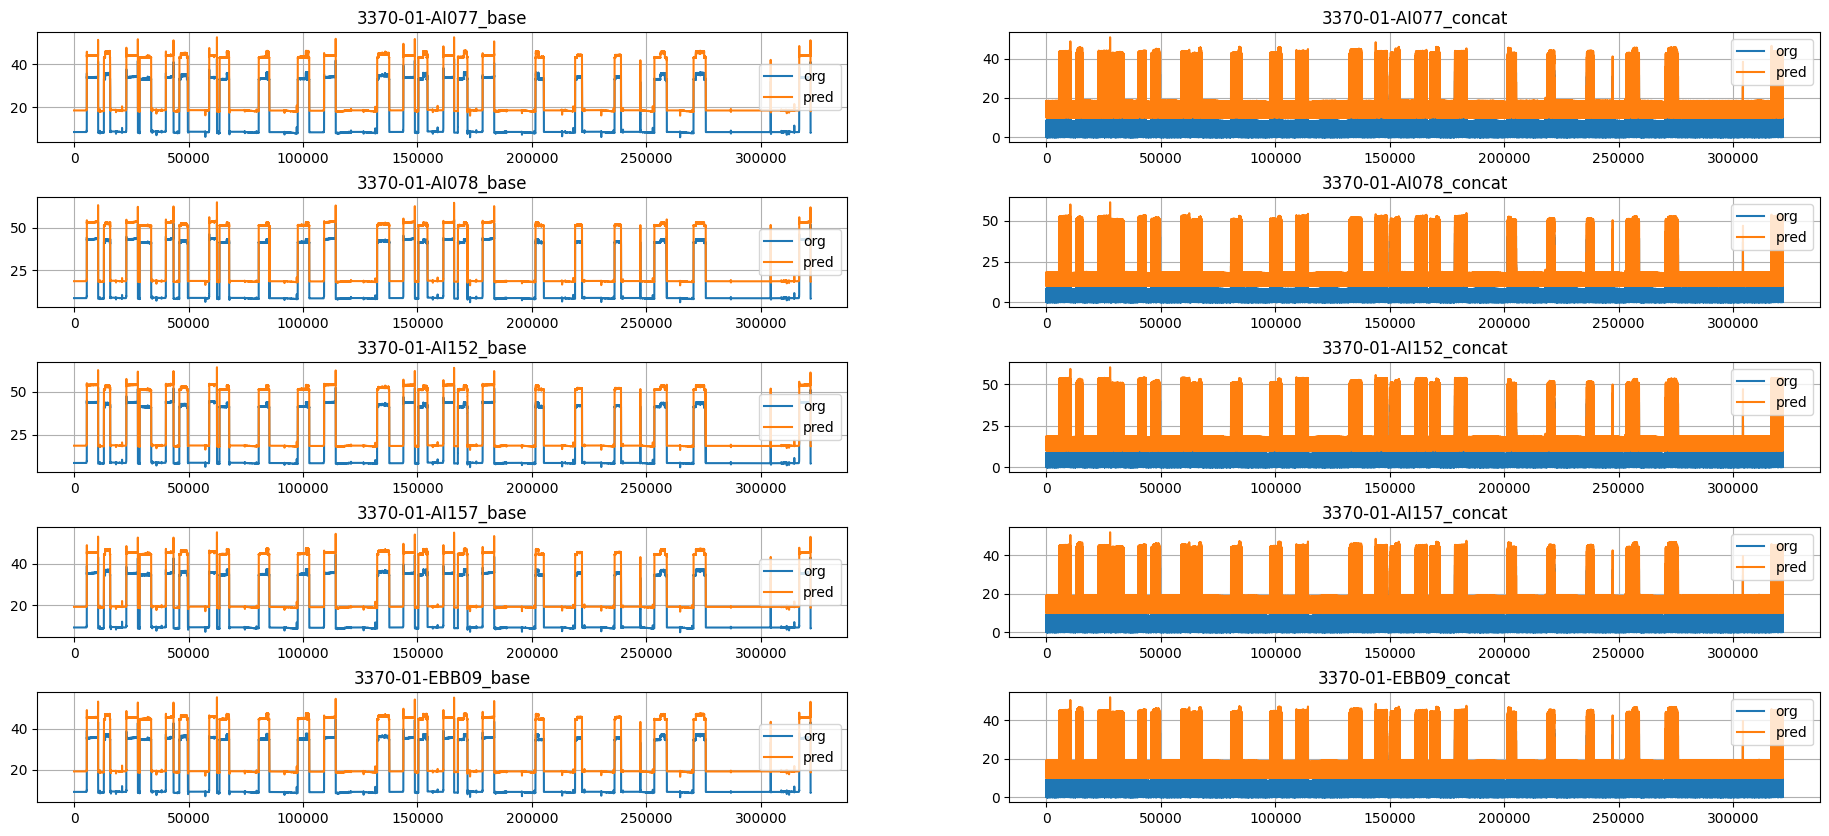

In [83]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(23, 10))
plt.subplots_adjust(hspace=0.5)

# 합치기 전 1번모델
pred_name1 = PRESS_HEADCOVER
for i, ax in enumerate(axes[:pred_name1.shape[1]-2, 0]):  # Use the first three rows and the first column
    ax.plot(pred_name1[pred_name1.columns[:-2][i]].values,label='org')
    ax.plot(pred_name1[pred_name1.columns[:-2][i]].values+10,label='pred')
    ax.grid()
    ax.set_title(f'{pred_name1.columns[:-2][i]}_base')
    ax.legend()

# 합치기 전 2번모델
pred_name2 = PRESS_WICKETGATED
for i, ax in enumerate(axes[pred_name1.shape[1]-2:, 0]):  # Use the first two rows and the first column
    ax.plot(pred_name2[pred_name2.columns[:-2][i]].values,label='org')
    ax.plot(pred_name2[pred_name2.columns[:-2][i]].values+10,label='pred')
    ax.grid()
    ax.set_title(f'{pred_name2.columns[:-2][i]}_base')
    ax.legend()

# 합친 후 모델
pred_name3 = concat
for i, ax in enumerate(axes[:, 1]):  # Use all rows and the second column
    ax.plot(pred_name3[pred_name3.columns[i]].values,label='org')
    ax.plot(pred_name3[pred_name3.columns[i]].values+10,label='pred')
    ax.grid()
    ax.set_title(f'{pred_name3.columns[i]}_concat')
    ax.legend()
plt.show()
